# Tackle Effectiveness

Football, like many sports, is about territory. The offense is trying to gain territory and the defense is trying to stop them. In this dataset there are four main events: the snap, the transfer to the ball carrier (whether it's a handoff to a running back or a pass caught by the receiver), contact, and the tackle. The most important metric is one of the simplest: the yards the ball moved along the x coordinate between the transfer and the tackle. I've called this Tackle Effectiveness. The ultimate measure of succes of a tackle, from the defensive team's perspective, is to minimize the yards a ball carrier gains.

# Machine Learning Model

To better understand what affects Tackle Effectiveness in this dataset I wanted to run a machine learning model to determine what variables have the most impact on Tackle Effectiveness. I chose a basic random forest model because random forest minimizes overfitting, is robust in handling the conversion of categorical variables to numeric variables, and it's relatively easy to isolate feature importance. 

Before utilizing the model, I went through a robust feature engineering process and created:
1. Mass - a player's weight times height
2. Momentum - a player's mass times speed
3. Force - a player's mass times acceleration
4. Ball Direction Variance - the difference between each player's direction and the ball carrier's direction an a 360 degree plane
5. Momentum Vector - Momentum times Ball Direction Variance; a measure of the potential impact between a tackler and a ball carrier
6. Force Vector - Force times Ball Direction Variance
7. The distance the ball carrier (and consequently, the ball) moves on the x cooridate between: snap to transfer, snap to contact, snap to tackle, transfer to contact, and transfer to tackle (the Tackle Effectiveness metric)
8. The total distance on both the x and y coordinates the tackler moves between those same events. This is amount of overall two dimensional ground they have to cover between these events
9. The number of defenders within 2 yards of the ball carrier at the tackle event on each play
10. The average distance of all 11 defenders from the ball carrier at the tackle event on each play
11. The number of tackles for each player
12. The number of tacklers on each play. It was either 1 player if there was a tackler on the play, or 2 players if an assist was listed on the play

When I ran the random forest model on the 10,035 unique plays with a tackle event, I received a mean squared log error of 0.4638 and the following list of permutation importance for the features:

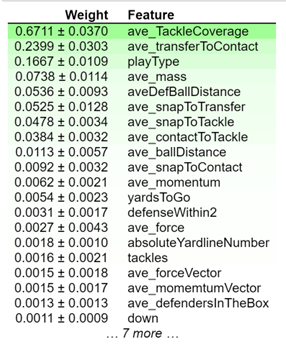

# Tackle Coverage

As shown by the feature permutation analysis, by far the most impactful feature was Tackle Coverage. This measures the total two dimensial yards on the x and y coordinates a tackler covers from where they were when the transfer event occurs to where they were when the tackle event occurs. 

And this makes sense. The better positioned a tackler is when the ball transfer takes place, the less ground they have to cover to make the tackle, and the higher the probability that the ball carrier gains a minimal amount of yards from when they receive the ball to when they are tackled. All the other features in this dataset pale in comparison in importance. 

# Review by Position

To gain more insight into these metrics it would be interesting to see what it might look like to view all the players in the league at one position. For simplicity sake I chose middle linebacker. There were a small number of them and it would therefore be easier to see in a graph. 

To provide context I created four quandrants:
* The bottom left quandrant are efficient tacklers. They have both low value for Tackle Effectiveness and Tackle Coverage. 
* The bottom right quandrant are more athletic tacklers. Their Tackle Coverage is high, but their Tackle Effectiveness is low. That means they may not always be in the best position to make a tackle, but their athleticisim makes up for it. 
* The top right quandrand are tacklers that are chasing down ball carriers. They give up a lot of yards on both Tackle Effectiveness and Tackle Coverage. 
* Finally, the top left quandrant are ineffective tacklers. They may have a low Tackle Coverage and be in a good position for a tackle, but they don't execute well on the tackle and have higher Tackle Effectiveness.

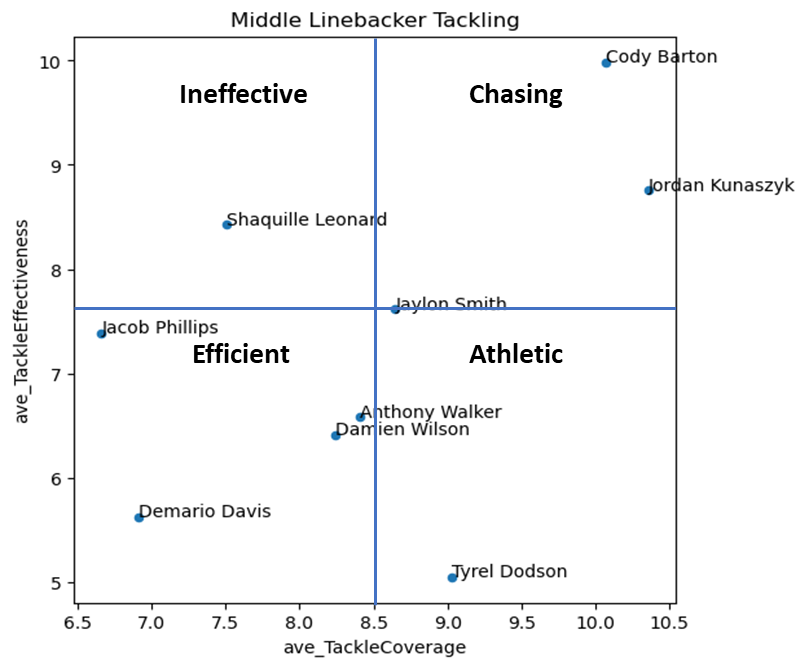

A note on these values. They are very high. A minimum value of 5 yards for Tackle Effectiveness is really not that effective. I found that when I looked at the total yards the ball moved from the first frame to the last frame of each play it was about 50% higher than the listed yards for the Play Result for that play. I documented this finding in this Kaggle notebook: https://www.kaggle.com/code/twinpilgrim/play-result-not-matching-the-frames-ball-movement. 

Another approach to reviewing this data would be to look at the results for all players for one team. Since Kansas City won the Super Bowl last year, I chose them. 

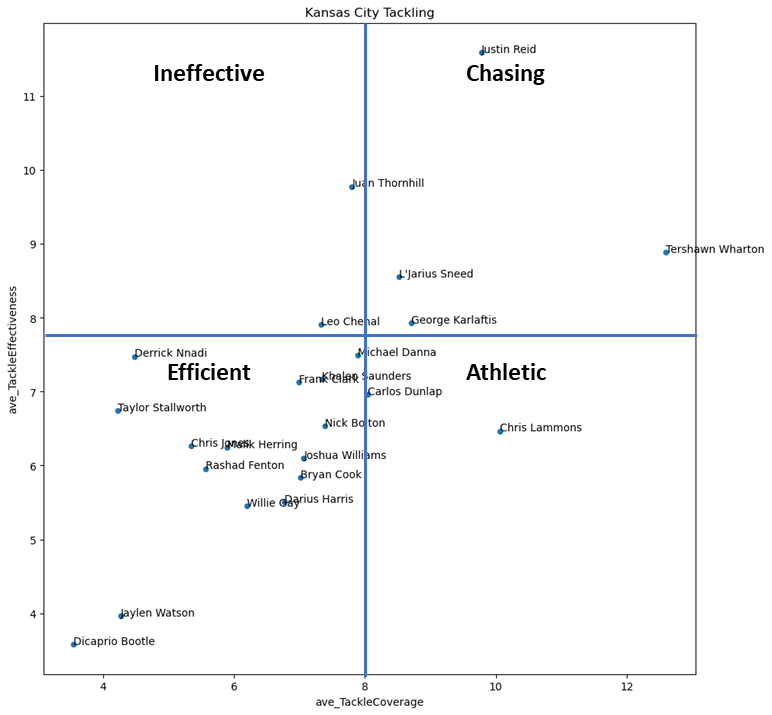

To see what the potential impact improving Tackle Coverage might have on Tackle Effectiveness, I ran a linear regression on the two values with the core dataset of over 10,000 rows. It showed an R-squared value of 0.408 and a linear equation of y = 0.64x + 2.322. L'Jarius Sneed has an average Tackle Coverage of 8.52 yards and an average Tackle Effectiveness of 8.55 yards. If I reduced his Tackle Coverage to 7 yards, then his Tackle Effectiveness could potentially improve to 6.8 yards based on the linear equation. 

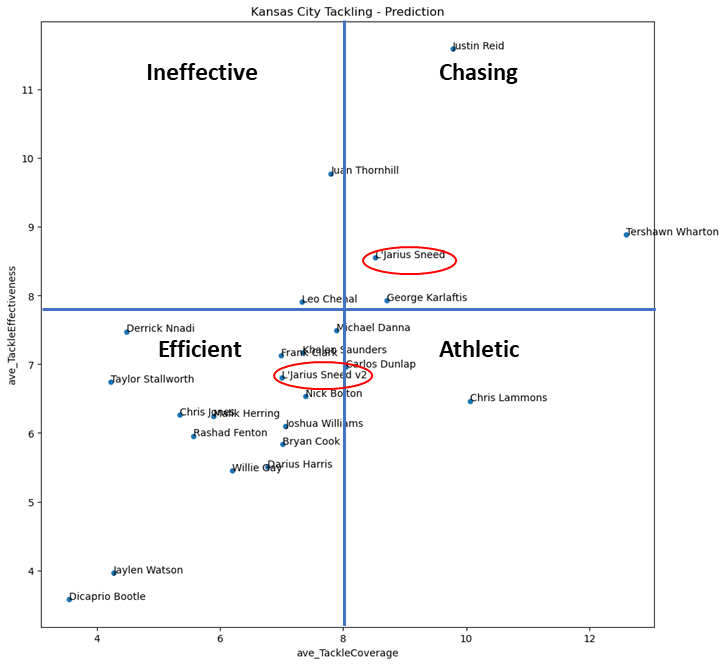

# Review by Teams

It's also interesting to review these metrics for all the teams in the league. As an exercise I tested what could possibly happen if Philadephia's (selected because they were Kansas City's opponent in the Super Bowl) Tackle Coverage reduced from 7.15 to 6.75. In this case their Tackle Effectiveness improved from 7.61 to 6.64. 

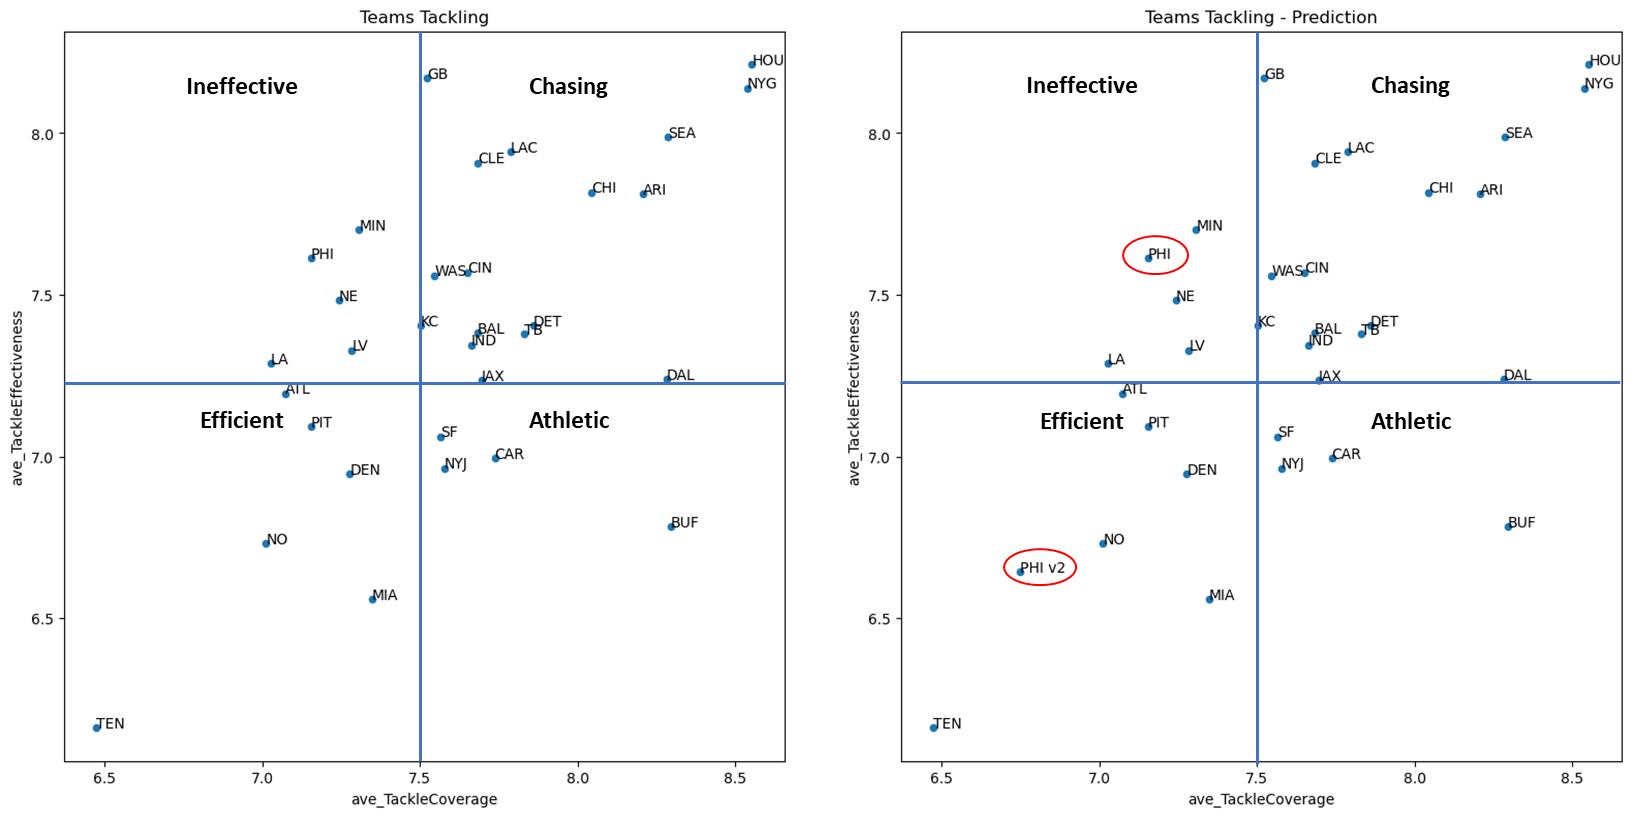

# Review by Position

Reviewing these metrics by position begins to illustrate the importance of run plays versus pass plays. First an overview of the labeled positions. 

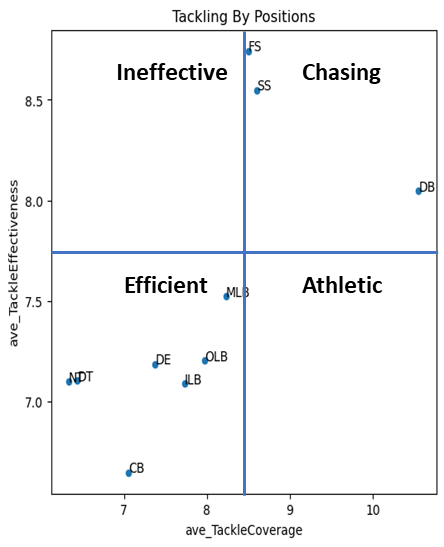

Breaking this data down by run and pass plays paints a much different picture. 

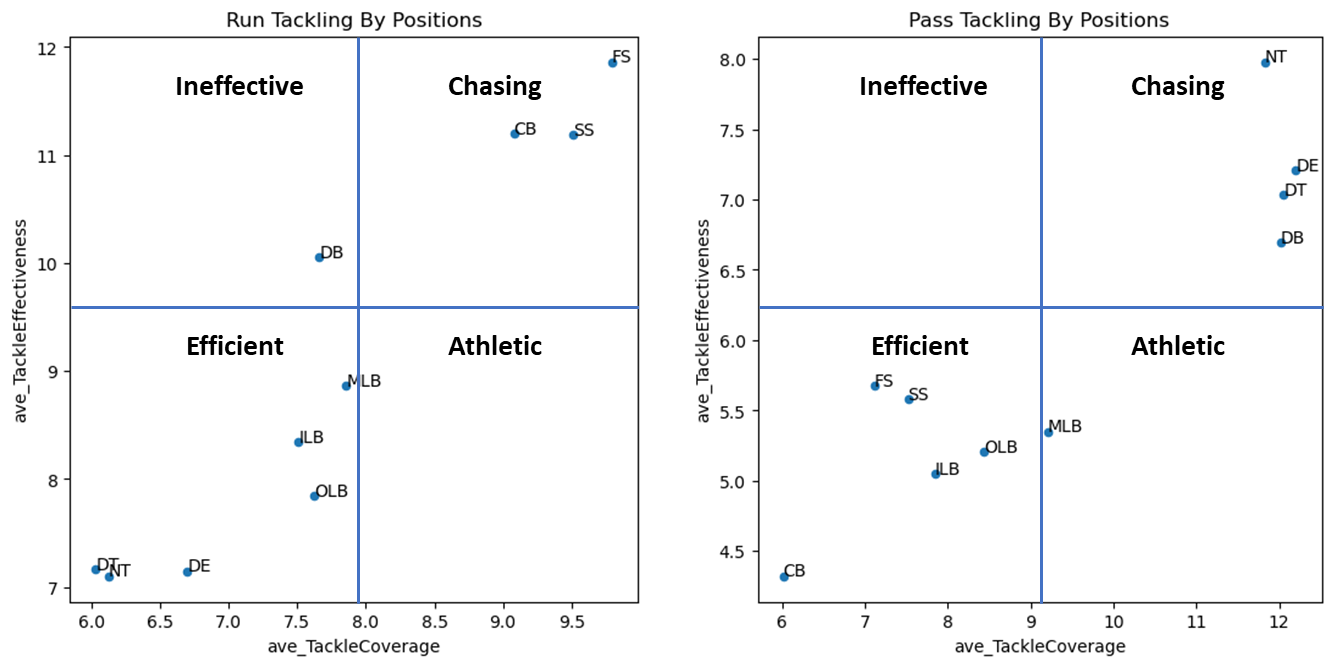

Safeties and cornerbacks are chasing run plays as they have to cover ground to make tackles on ball carriers that have gotten past the defensive line and linebackers. On the other hand, they cover much less ground on pass plays as they tackle receivers catching the ball close to them in coverage. On pass plays, it's the defensive linemen who are covering ground as they pursue receivers on screens or other plays away from them where they arrive quicker than defensive backs. And linebackers, by their roles within most defensive sets, are relatively efficient on both runs and passes. 

# Progression in Tackle Effectiveness

To get a more detailed look at the behavior of Tackle Effectiveness I broke the results into eight sections to see how some of the metrics behave as Tackle Effectiveness changes. As a note, in converting Play Types from categorical to numerical data, passes were given a value of 1 and runs a value of 2. 

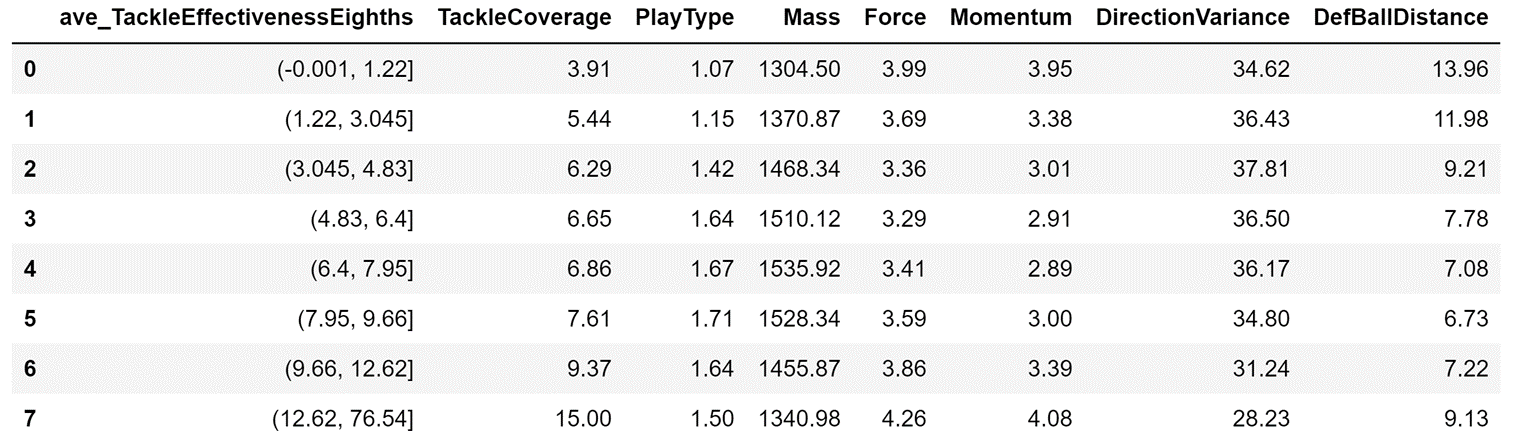

As the Tackle Effectiveness increases Tackle Coverage increases inline. What's interesting is that at the lowest Tackle Effectiveness values plays are mostly passes and the player's Mass is low. This probably means these lowest values reflect pass plays where smaller defensive backs are tackling receivers right as they catch the ball. Force and Momentum are high, but Direction Variance is lower. This probably means they are running along with the receiver and not tackling them head on. The Average Ball Distance of all the defenders is highest which reflects the fact these defensive backs are pretty much by themselves out on their own islands when they make the tackle. 

As the Tackle Effectiveness increases, the plays become more running plays, Mass increases, Force and Momentum decrease, Direction Variance increases and the Average Ball Distance decreases. These are tackles made by larger players, moving more slowly, more head on to the ball carriers, and in more traffic. 

At the highest levels of Tackle Effectivess, players are chasing down the ball carriers. They become lighter, it becomes an equal mix of runs and passes, Force and Momentum increase dramatically, Direction Variance decreases as they are primarily running the same direction as the ball carriers, and there are less defensive players near the tackle. 

# Improving Tackle Coverage

So how can we utilize this data to improve Tackle Coverage and therefore improve Tackle Effectiveness? To try to understand this better, I ran the same random forest model on this dataset with Tackle Coverage as the dependent variable. The only difference is I took out all the player movements since they seemed to create overlapping multicollinarity on the model. 

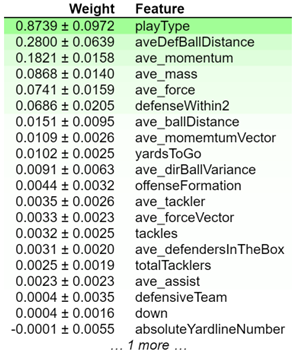

Play Type had by far the most impact. Which makes sense based on some of the analysis done so far. 

But how useful is that? What it really boils down to is that improving Tackle Coverage, the position a player is in to make a tackle, is not a simple solution. It's a matter of how well a defensive alignment positions its players relative to what an offensive is trying to do. Play Type is a reflection of that. If defenders are positioned well to defend a run or to defend a pass and it matches what the offense does, then the odds of better Tackle Effectiveness and therefore less yards gained improve. But if defenders are not aligned to what an offensive does, then the odds are much better the offense will gain more yards and Tackle Effectiveness will have a higher value. This is not an easy solution and it's why a great defensive coordinator is worth his weight in gold. 

This dataset reaches a certain limit in trying to better analyze ways to improve Tackle Coverage. To see the direction that could be taken I looked at Tackle Coverage for Offensive Formation against Defenders In The Box.  

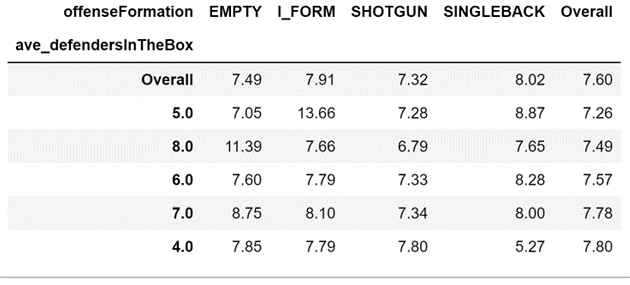

As a note, the two highest values of 13.66 and 11.39 just reflect low numbers of instances of those combinations. This analysis shows a few potantial tendencies, but probably isn't specific enough to truly help in defensive planning. However, this analysis could point to ways to improve Tackle Coverage with the more robust formation datasets I'm sure the NFL and the teams have. 

APPENDIX LINK